# UAS (Differentiated Thyroid Cancer Recurrence)

# Sumber Data

Dataset diambil dari link dibawah ini:

https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence

In [17]:
!pip install ucimlrepo

## 1. Data Understanding

### a. penjelasan fitur

Kode tersebut digunakan untuk mengambil dan menyiapkan dataset *Differentiated Thyroid Cancer Recurrence* dari UCI Machine Learning Repository. Pertama, kode mengimpor fungsi `fetch_ucirepo` dari pustaka `ucimlrepo`, yang memungkinkan pengambilan dataset secara langsung dari situs UCI tanpa perlu mengunduh manual. Selanjutnya, dataset dengan ID 915, yang merupakan dataset mengenai kekambuhan kanker tiroid terdiferensiasi, diambil dan disimpan dalam variabel `differentiated_thyroid_cancer_recurrence`. Dataset ini kemudian dipisahkan menjadi dua bagian utama: `X` yang berisi fitur-fitur atau variabel input, dan `y` yang berisi target atau label yang akan diprediksi. Untuk mengetahui informasi tambahan mengenai dataset, seperti nama, deskripsi, sumber, dan jumlah data, metadata ditampilkan menggunakan `print(differentiated_thyroid_cancer_recurrence.metadata)`. Selain itu, detail masing-masing variabel, seperti nama kolom, tipe data, dan deskripsinya, juga ditampilkan melalui `print(differentiated_thyroid_cancer_recurrence.variables)`. Secara keseluruhan, kode ini mempermudah pengguna dalam mengakses dan memahami struktur dataset sebelum melakukan analisis atau pembangunan model machine learning.

In [18]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
differentiated_thyroid_cancer_recurrence = fetch_ucirepo(id=915)

# data (as pandas dataframes)
X = differentiated_thyroid_cancer_recurrence.data.features
y = differentiated_thyroid_cancer_recurrence.data.targets

# metadata
print(differentiated_thyroid_cancer_recurrence.metadata)

# variable information
print(differentiated_thyroid_cancer_recurrence.variables)


{'uci_id': 915, 'name': 'Differentiated Thyroid Cancer Recurrence', 'repository_url': 'https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence', 'data_url': 'https://archive.ics.uci.edu/static/public/915/data.csv', 'abstract': 'This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 383, 'num_features': 16, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': ['Age', 'Gender'], 'target_col': ['Recurred'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2023, 'last_updated': 'Wed Mar 20 2024', 'dataset_doi': '10.24432/C5632J', 'creators': ['Shiva Borzooei', 'Aidin Tarokhian'], 'intro_paper': {'ID': 333, 'type': 'NA

### b. Eksplorasi Data

Kode tersebut digunakan untuk melakukan eksplorasi awal terhadap dataset Thyroid_Diff.csv yang diambil secara langsung dari GitHub melalui URL. Dataset ini dianalisis menggunakan pustaka pandas, seaborn, dan matplotlib. Langkah pertama adalah memuat dataset ke dalam variabel df menggunakan pd.read_csv. Setelah data dimuat, dilakukan pengecekan terhadap nilai yang hilang (missing values) menggunakan df.isnull().sum() untuk mengetahui apakah terdapat data kosong di setiap kolom. Selanjutnya, kode memeriksa keberadaan outlier pada kolom numerik menggunakan metode IQR (Interquartile Range). Untuk setiap kolom numerik, dihitung nilai kuartil pertama (Q1) dan kuartil ketiga (Q3), kemudian selisihnya (IQR) digunakan untuk menentukan batas bawah dan atas. Data yang berada di luar batas tersebut dianggap sebagai outlier, dan jumlahnya ditampilkan per kolom. Terakhir, dilakukan analisis distribusi dari variabel target Recurred, yaitu status kekambuhan kanker tiroid. Distribusi ini ditampilkan secara numerik menggunakan value_counts() dan secara visual melalui grafik batang sns.countplot, sehingga dapat diketahui apakah jumlah pasien yang mengalami kekambuhan dan tidak seimbang atau tidak. Proses ini penting sebagai tahapan awal sebelum melanjutkan ke proses preprocessing atau pemodelan.

Missing Values :
Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

Outlier Check (IQR Method):
Age: 0 outlier(s)

=== Distribusi Kelas Target ===
Recurred
No     275
Yes    108
Name: count, dtype: int64



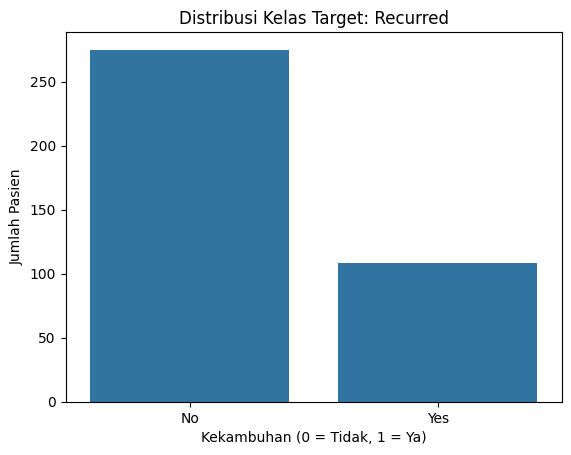

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------
# 0. LOAD DATA
# ----------------------------
url = "https://raw.githubusercontent.com/madhulathachavali/Predicting-Thyroid-Cancer-Recurrence-Using-Clinicopathologic-Features/main/Thyroid_Diff.csv"
df = pd.read_csv(url)

# ----------------------------
# 1. CEK MISSING VALUE
# ----------------------------
print("Missing Values :")
print(df.isnull().sum())
print()

# ----------------------------
# 2. CEK OUTLIER DENGAN IQR
# ----------------------------
print("Outlier Check (IQR Method):")
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outlier(s)")

print()

# ----------------------------
# 3. DISTRIBUSI KELAS TARGET
# ----------------------------
print("=== Distribusi Kelas Target ===")
target_col = 'Recurred'
print(df[target_col].value_counts())
print()

# (Opsional) Visualisasi distribusi kelas target
sns.countplot(x=target_col, data=df)
plt.title("Distribusi Kelas Target: Recurred")
plt.xlabel("Kekambuhan (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah Pasien")
plt.show()


### c. Visualisasi Data

Kode ini digunakan untuk melakukan visualisasi data kategorikal dalam dataset Thyroid_Diff.csv yang diambil langsung dari repositori GitHub. Dataset tersebut dimuat ke dalam variabel df menggunakan pandas. Kolom target yang menjadi fokus analisis adalah 'Recurred', yaitu apakah pasien mengalami kekambuhan kanker tiroid atau tidak. Selanjutnya, kode mengekstrak semua kolom bertipe kategorikal (tipe object) dari dataset menggunakan select_dtypes. Untuk setiap kolom kategorikal, dilakukan dua jenis visualisasi dengan menggunakan seaborn dan matplotlib. Visualisasi pertama adalah countplot tanpa legenda, yang menampilkan distribusi nilai-nilai dari setiap kolom kategorikal, berguna untuk melihat proporsi kategori yang ada. Visualisasi kedua menunjukkan distribusi kolom tersebut berdasarkan status kekambuhan (Recurred), dengan pewarnaan berdasarkan kelas target untuk membantu analisis relasi antara fitur kategorikal dan outcome. Grafis ini sangat berguna untuk memahami pola atau kemungkinan keterkaitan antara variabel kategorikal tertentu dengan kondisi kekambuhan pada pasien kanker tiroid. Rotasi label pada sumbu x ditambahkan agar label kategori tetap terbaca jelas saat jumlah kategorinya banyak.

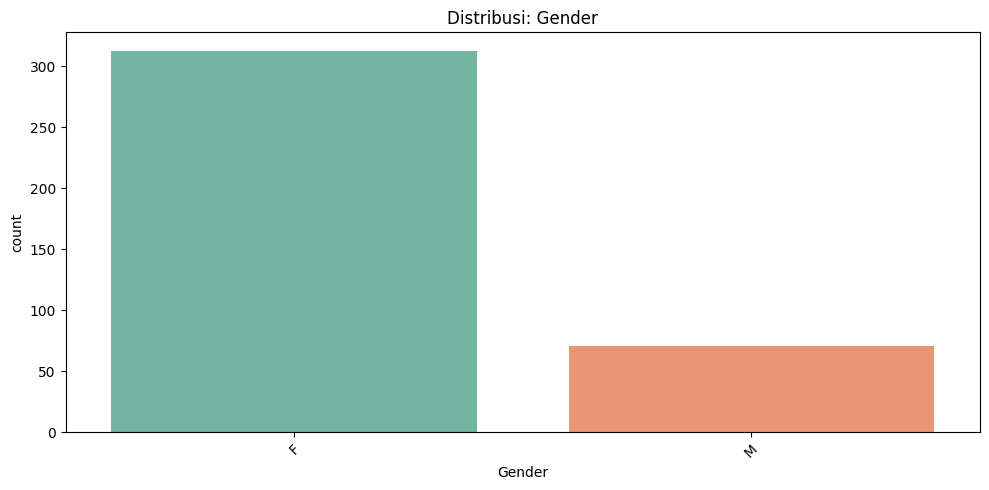

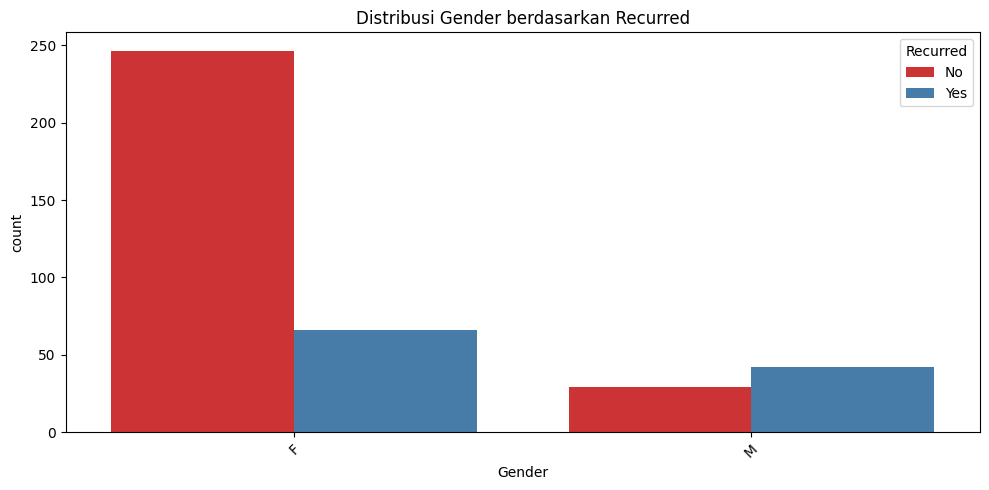

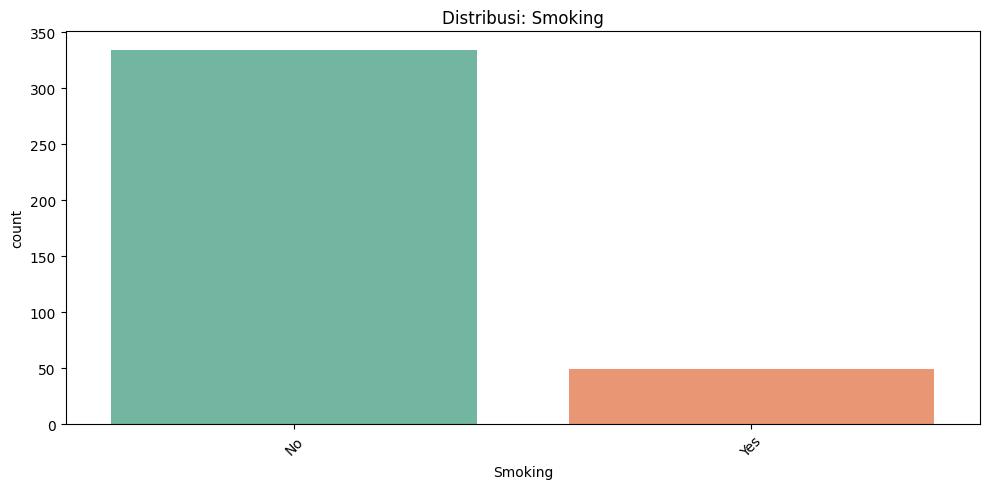

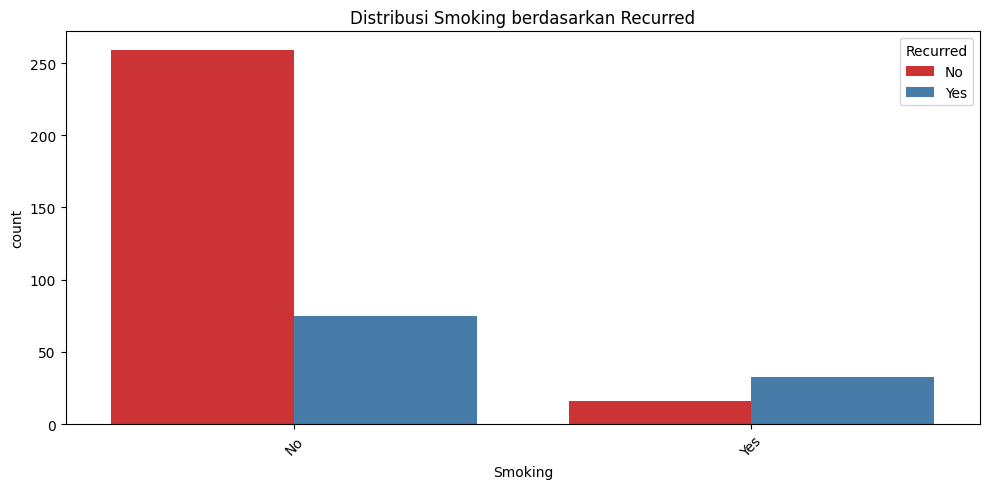

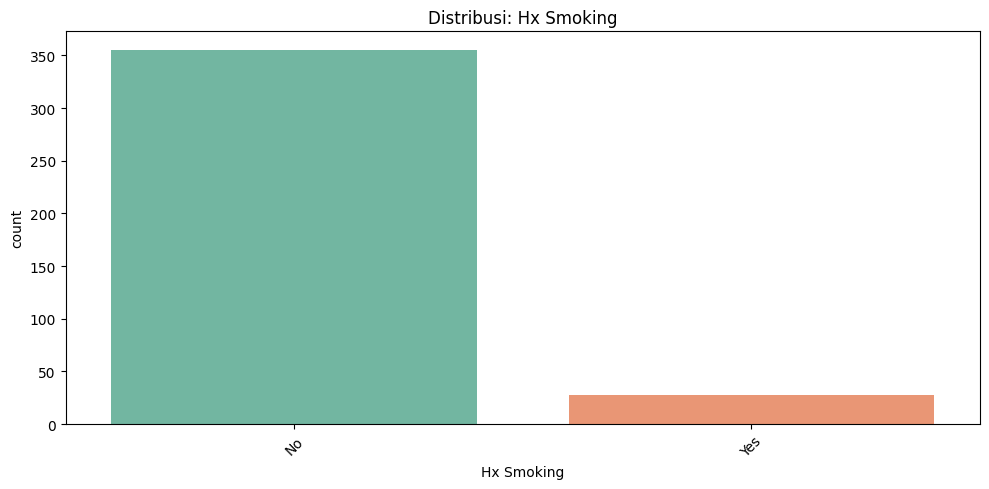

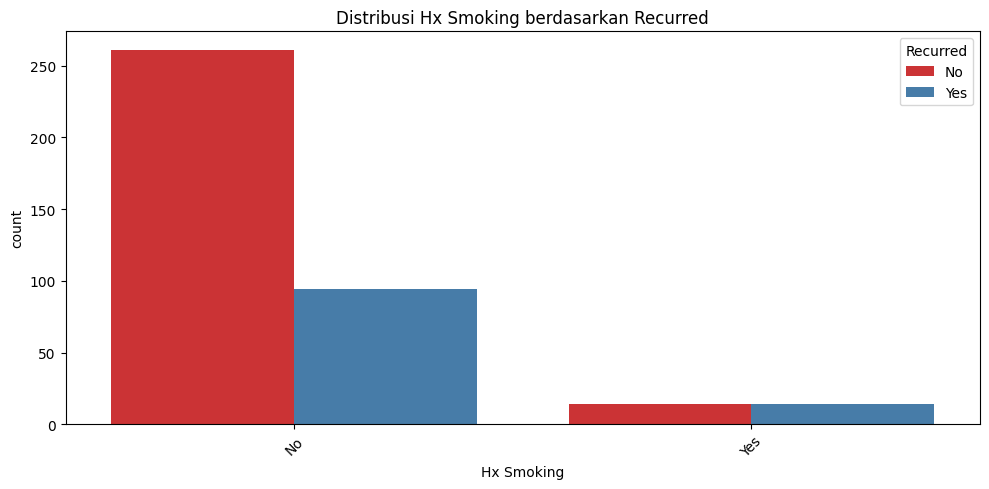

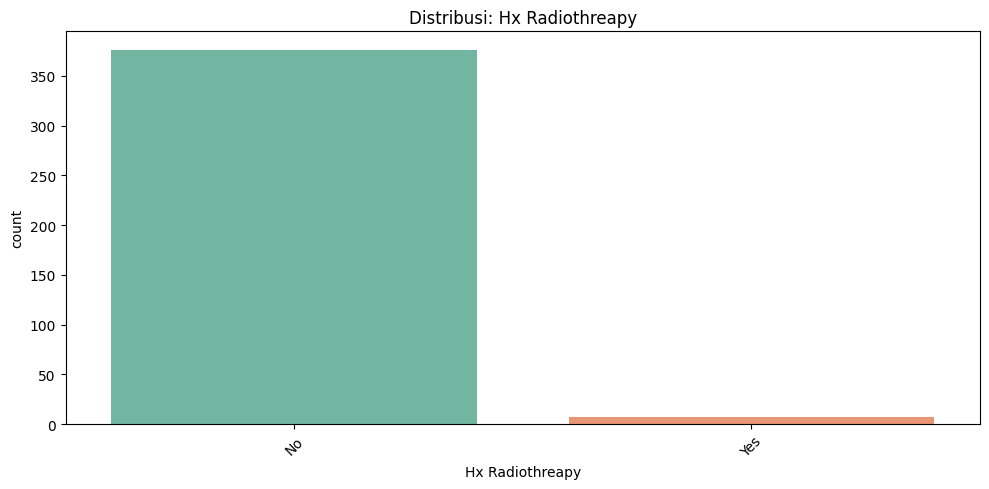

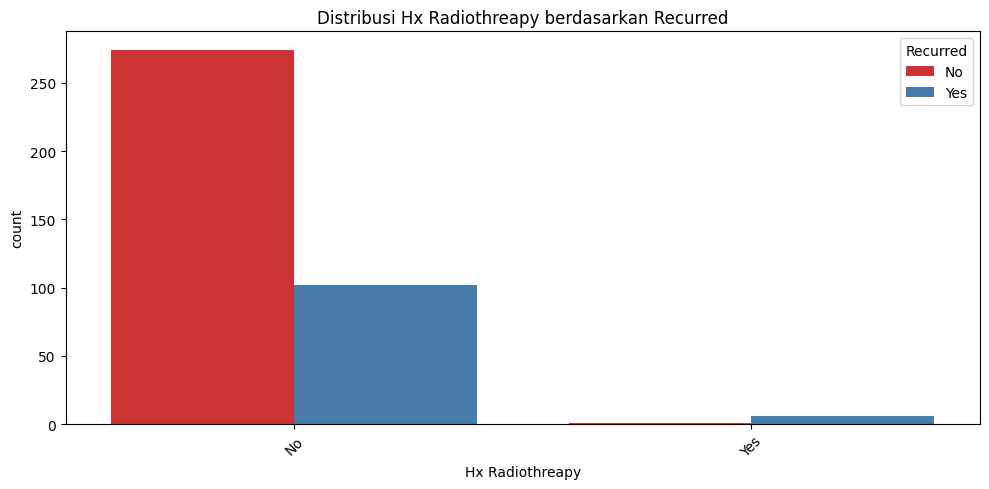

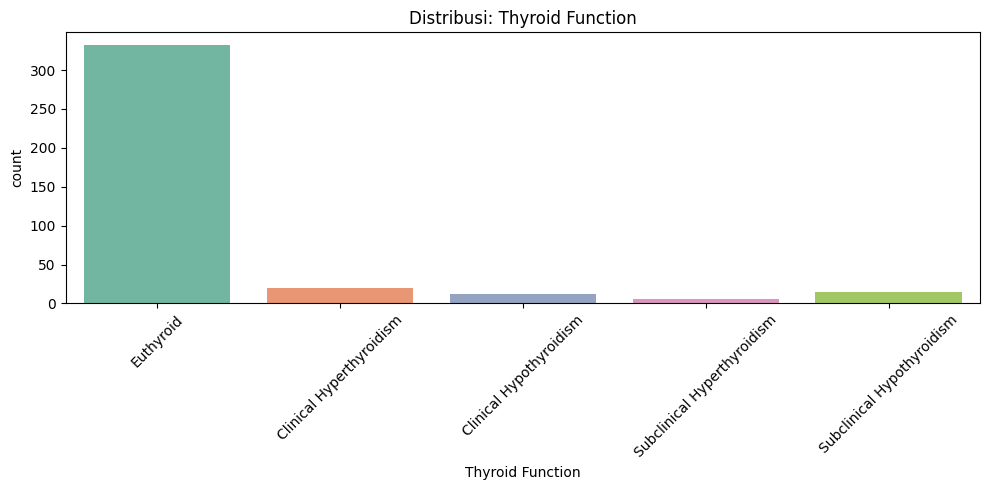

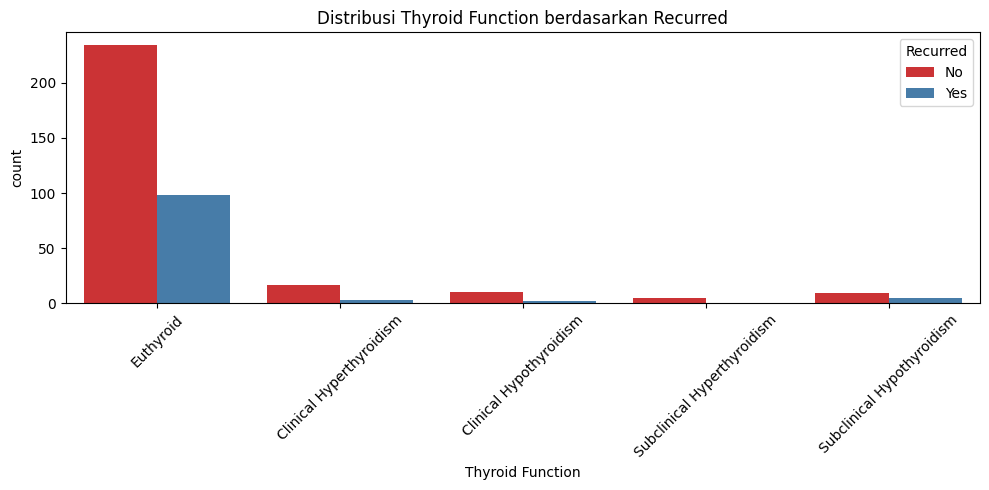

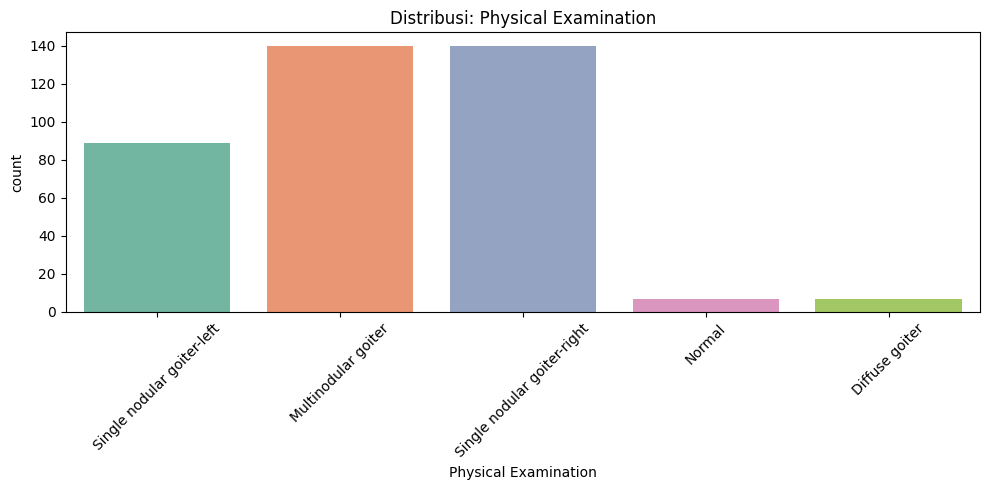

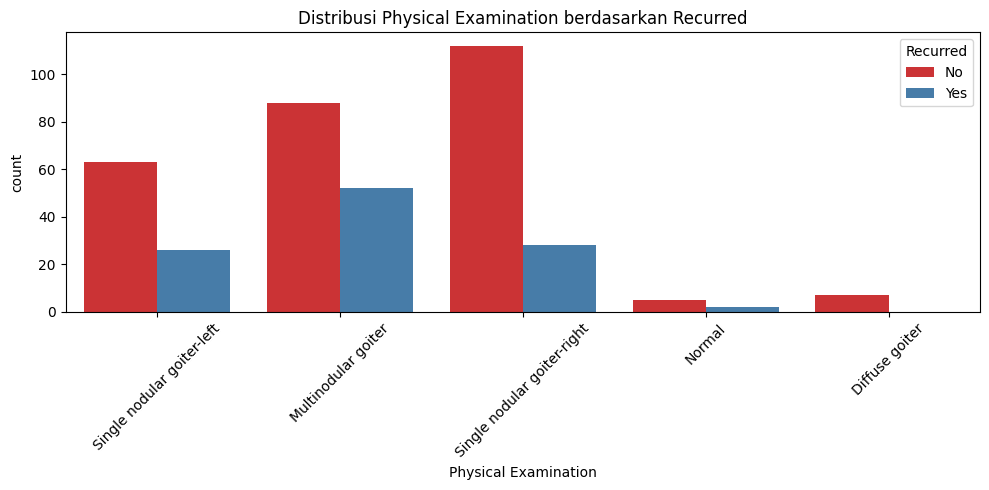

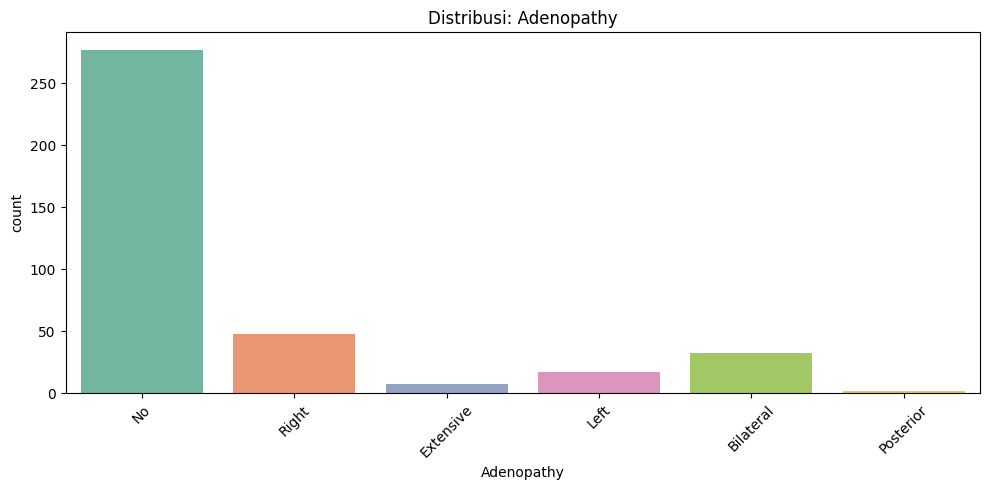

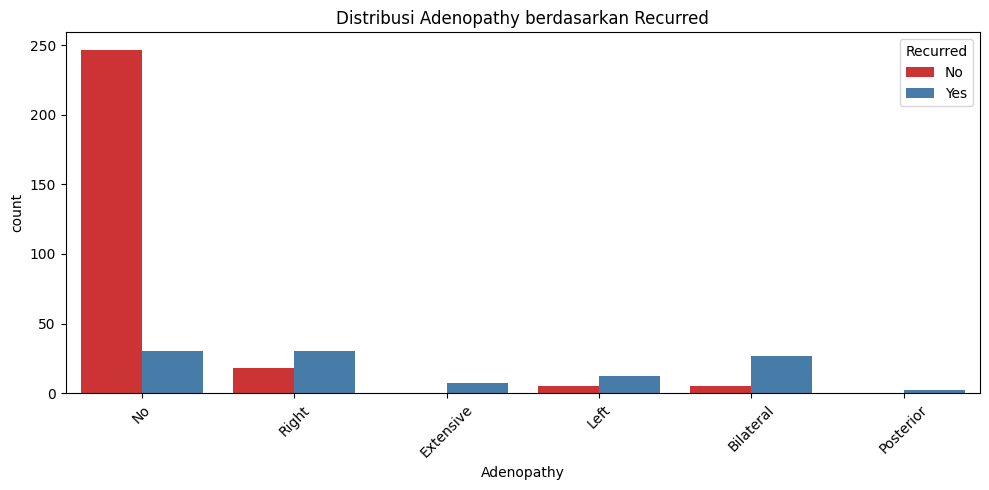

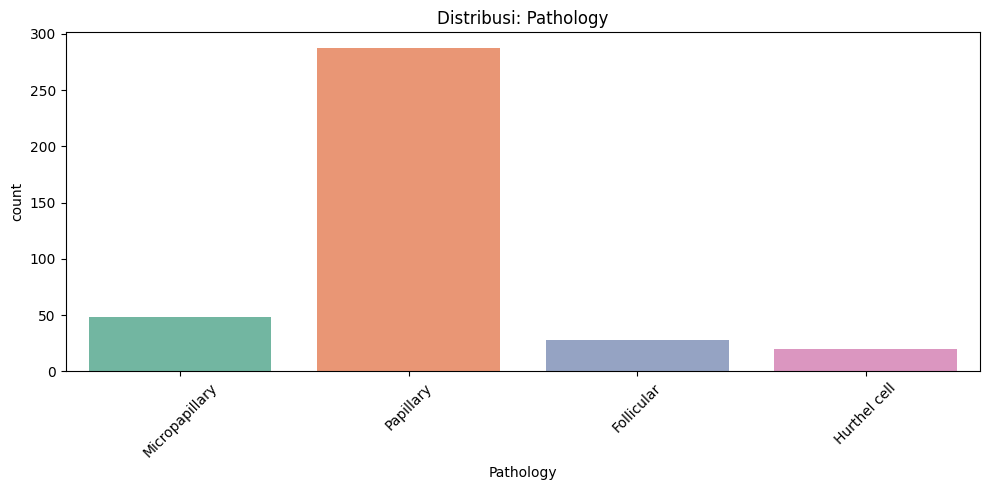

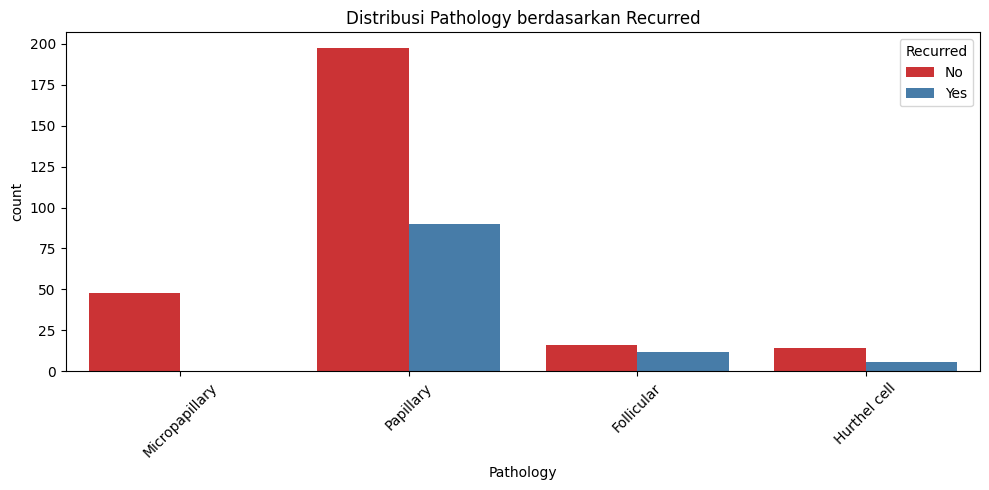

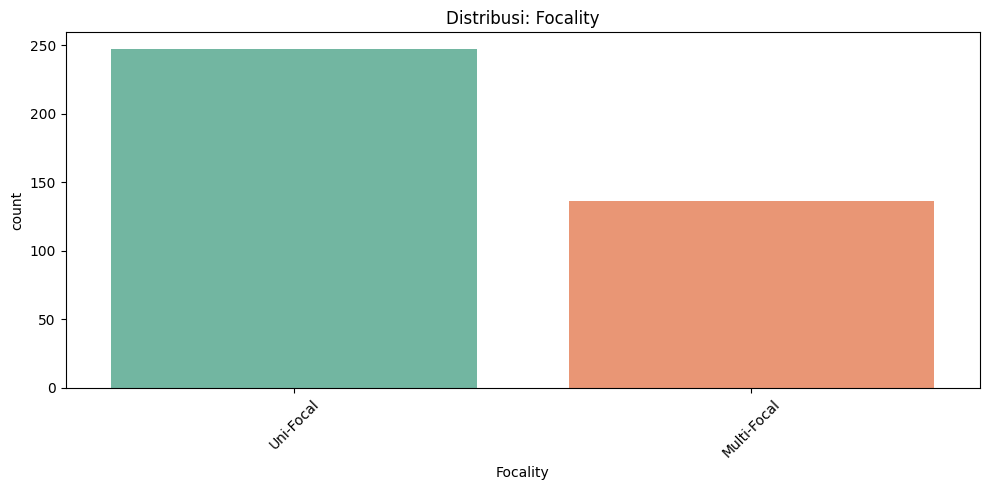

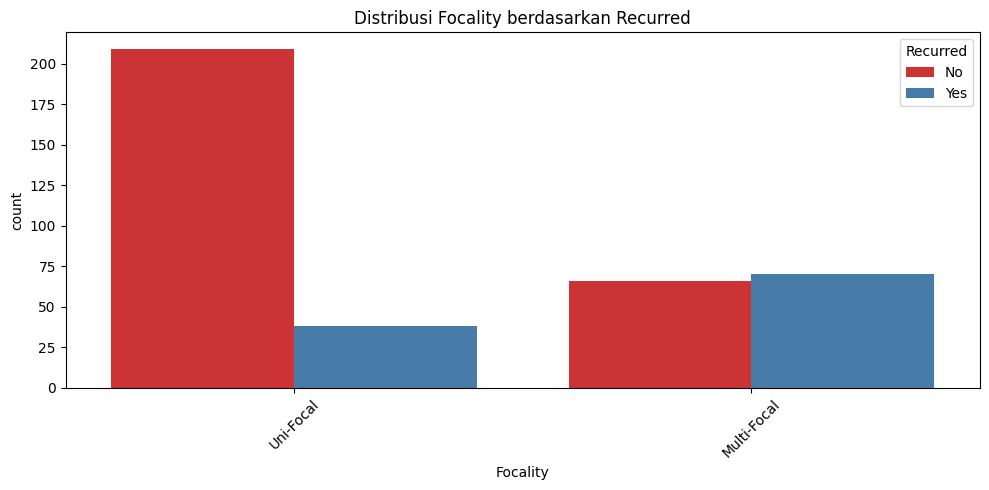

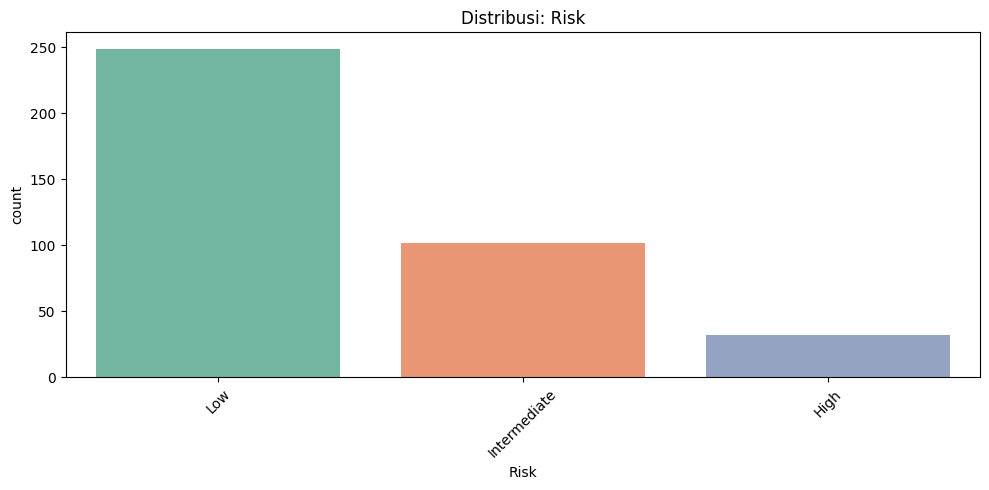

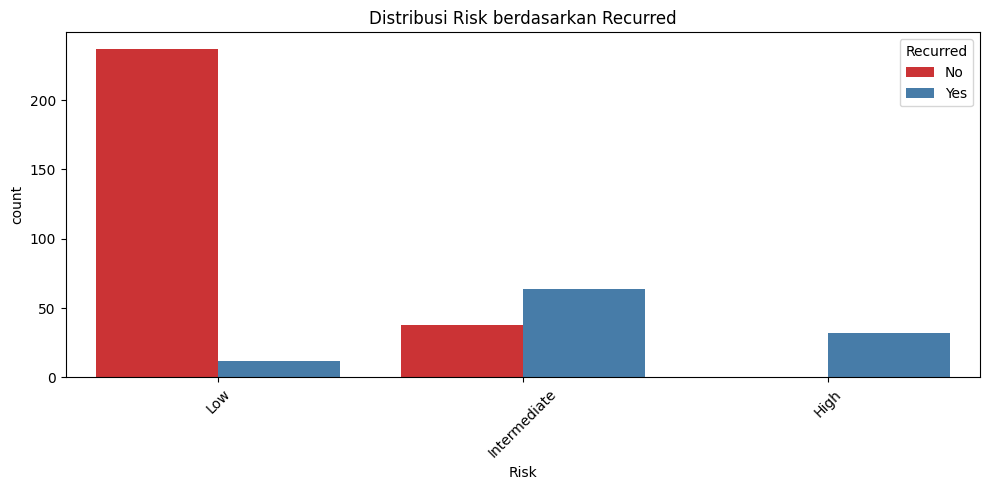

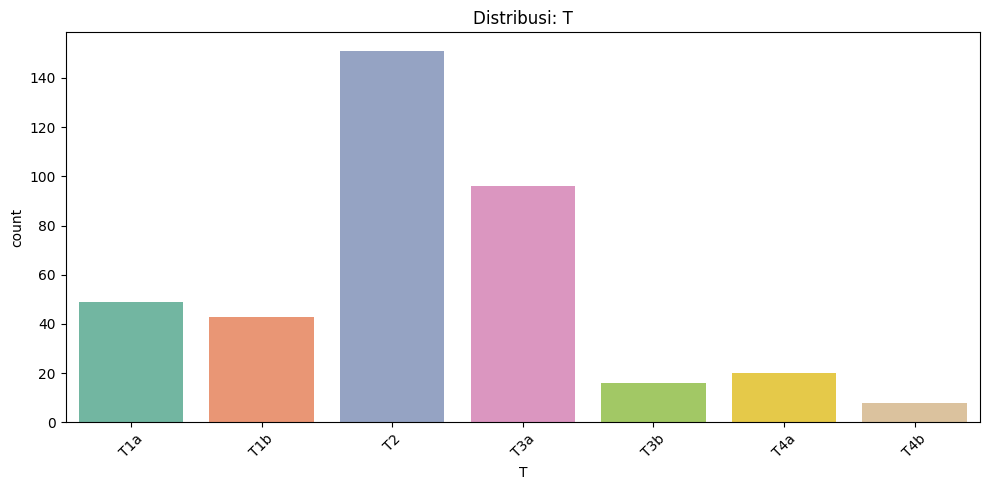

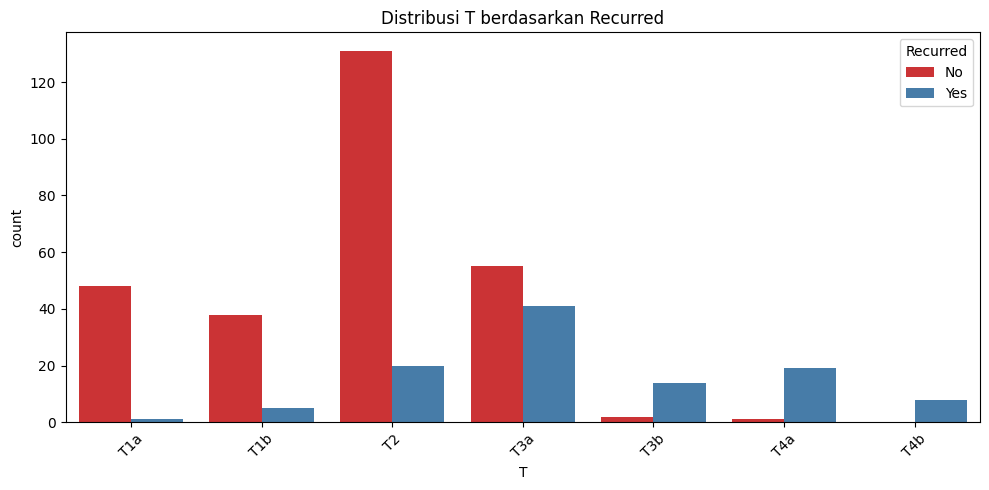

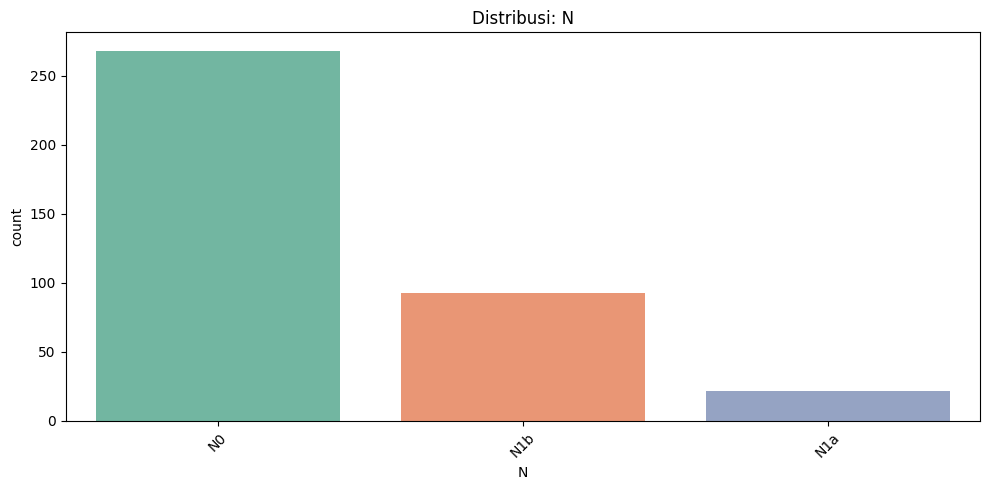

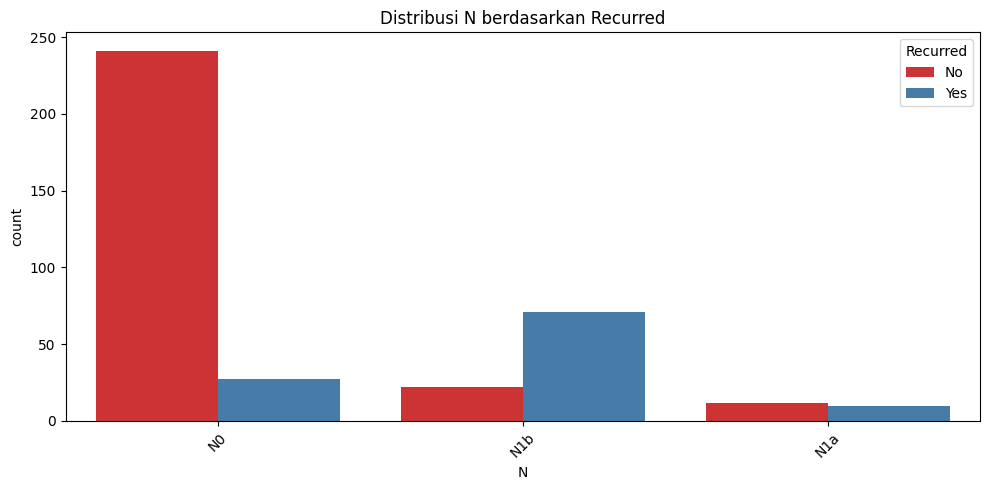

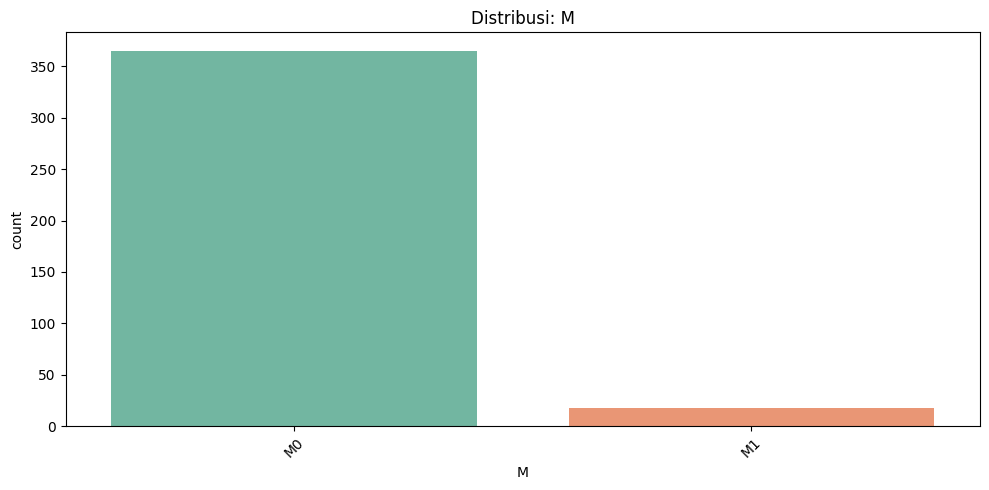

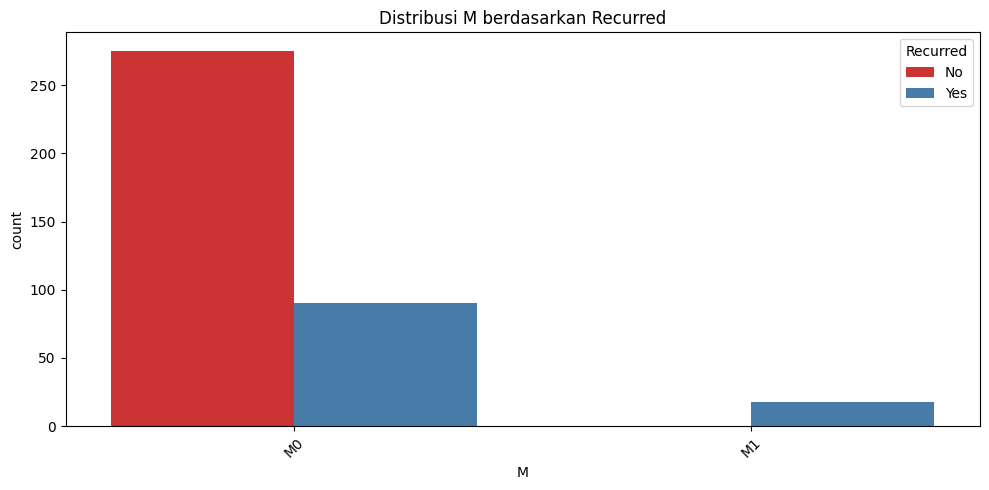

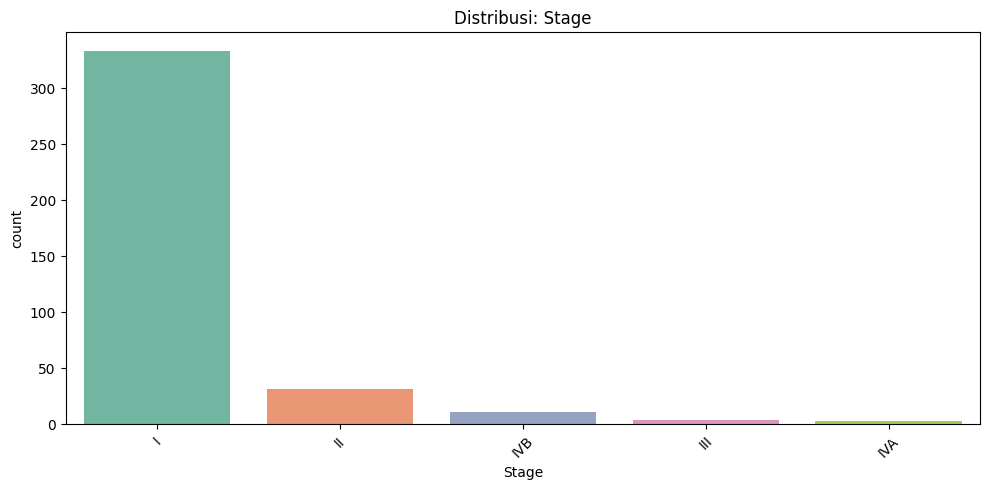

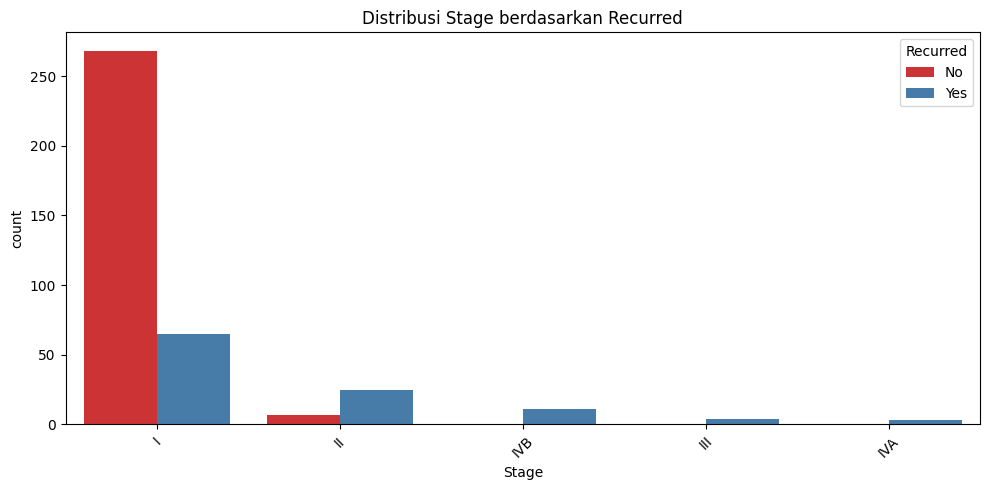

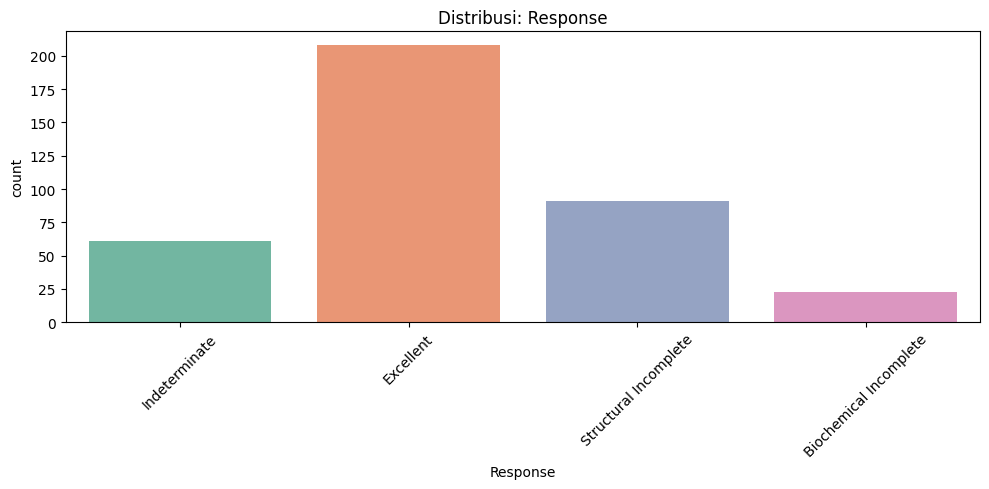

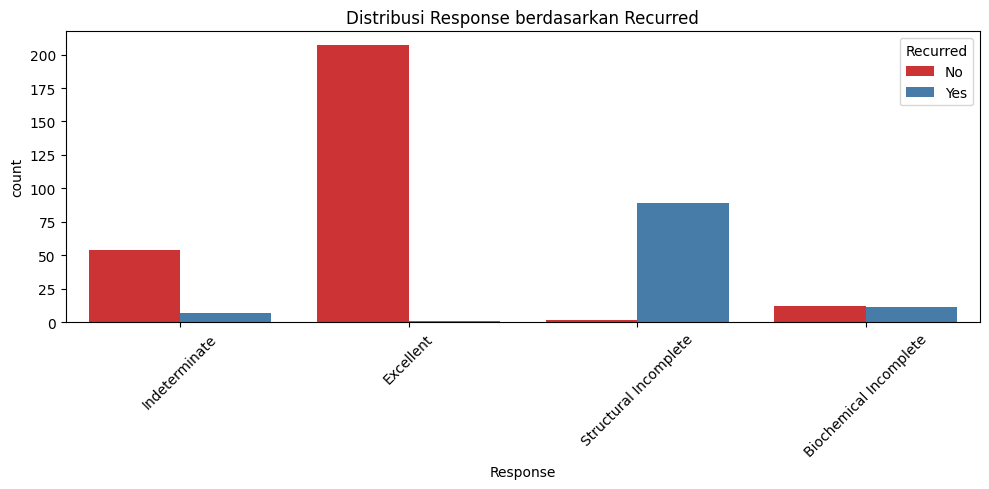

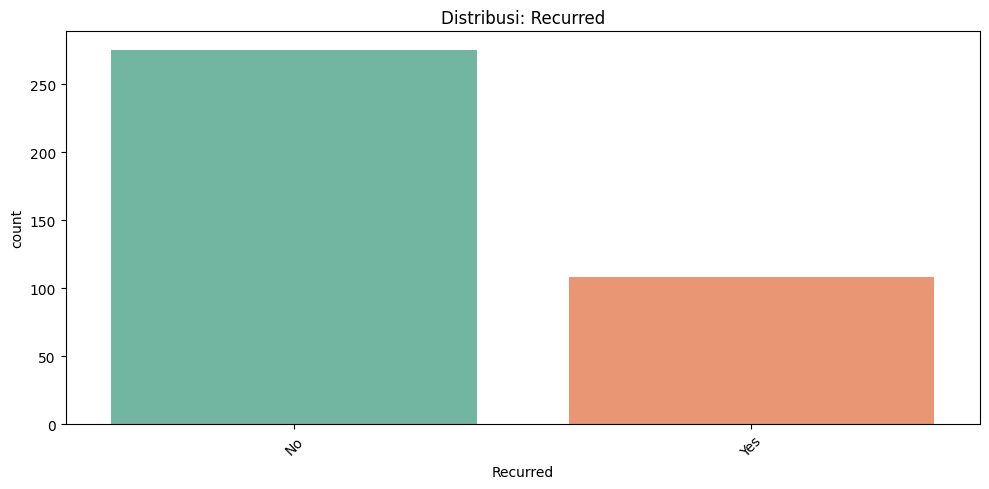

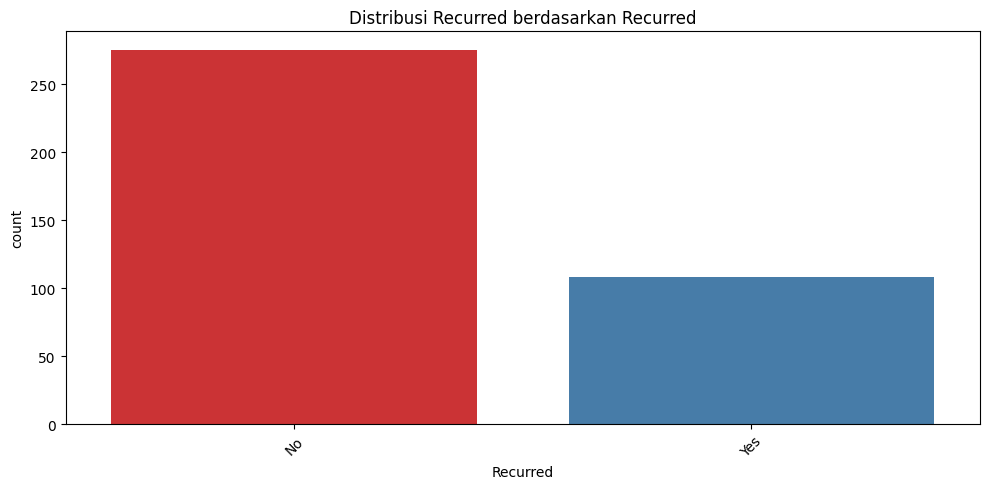

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data dari GitHub
url = "https://raw.githubusercontent.com/madhulathachavali/Predicting-Thyroid-Cancer-Recurrence-Using-Clinicopathologic-Features/main/Thyroid_Diff.csv"
df = pd.read_csv(url)

# Tentukan kolom target
target_col = 'Recurred'

# Ambil kolom kategorikal (object)
categorical_cols = df.select_dtypes(include='object').columns

# Loop visualisasi tiap kolom kategorikal
for col in categorical_cols:
    plt.figure(figsize=(10, 5))

    # Countplot dengan hue=col untuk pewarnaan, tapi tanpa legenda
    sns.countplot(data=df, x=col, hue=col, palette='Set2', legend=False)
    plt.title(f'Distribusi: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Countplot berdasarkan target
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue=target_col, palette='Set1')
    plt.title(f'Distribusi {col} berdasarkan {target_col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## 2. Prepocessing

Kode ini digunakan untuk melakukan pra-pemrosesan data (data preprocessing) terhadap dataset kanker tiroid yang diambil dari GitHub. Langkah pertama dimulai dengan memuat data ke dalam variabel df menggunakan pandas, lalu memisahkan data menjadi fitur (X) dan target (y), di mana targetnya adalah kolom 'Recurred' yang menunjukkan apakah pasien mengalami kekambuhan kanker atau tidak. Selanjutnya, kode mendeteksi kolom numerik dengan menggunakan select_dtypes, dan melakukan normalisasi terhadap kolom-kolom tersebut menggunakan MinMaxScaler dari pustaka scikit-learn, agar semua nilai numerik berada dalam rentang 0 hingga 1. Setelah itu, dilakukan proses encoding pada kolom kategorikal, di mana setiap nilai kategorikal diubah menjadi nilai numerik dengan LabelEncoder, agar dapat digunakan dalam algoritma machine learning yang hanya menerima input numerik. Hasil transformasi disimpan dalam variabel X_encoded. Selanjutnya, data dibagi menjadi data latih (X_train, y_train) dan data uji (X_test, y_test) dengan rasio 80:20 menggunakan train_test_split, dan disertai dengan stratify=y untuk menjaga proporsi kelas target tetap seimbang di kedua subset. Terakhir, bentuk data hasil pembagian ditampilkan beserta contoh isi dari X_train. Proses ini merupakan tahap penting sebelum melatih model klasifikasi untuk prediksi kekambuhan kanker tiroid.


In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Load dataset tiroid dari URL
url = "https://raw.githubusercontent.com/madhulathachavali/Predicting-Thyroid-Cancer-Recurrence-Using-Clinicopathologic-Features/main/Thyroid_Diff.csv"
df = pd.read_csv(url)

# 2. Pisahkan fitur (X) dan target (y)
X = df.drop('Recurred', axis=1)
y = df['Recurred']

# 3. Deteksi kolom numerik
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# 4. Normalisasi data numerik
scaler = MinMaxScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# 5. Encoding kolom kategorikal
X_encoded = X_scaled.copy()
categorical_cols = X_encoded.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# 7. Tampilkan informasi akhir
print("Bentuk data X_train:", X_train.shape)
print("Bentuk data X_test :", X_test.shape)
print("Contoh data X_train:")
print(X_train.head())


Bentuk data X_train: (306, 16)
Bentuk data X_test : (77, 16)
Contoh data X_train:
          Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
331  0.537313       0        0           0                0                 2   
348  0.641791       0        0           0                0                 4   
122  0.194030       0        0           0                0                 2   
359  0.298507       0        0           0                0                 2   
366  0.731343       0        0           1                0                 2   

     Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
331                     3           3          0         1     1  3  0  0   
348                     1           1          3         0     1  4  2  0   
122                     3           3          3         1     2  2  0  0   
359                     1           1          3         0     0  5  2  0   
366                     1           3         

## 3. Modelling (Klasifikasi Data)

Kode ini digunakan untuk membandingkan performa tiga model klasifikasi—Random Forest, Support Vector Machine (SVM), dan Logistic Regression—dalam memprediksi kekambuhan kanker tiroid berdasarkan dataset Differentiated Thyroid Cancer Recurrence yang diambil langsung dari UCI Machine Learning Repository menggunakan fetch_ucirepo. Setelah memuat data, fitur (X) dan target (y) dipisahkan, lalu target diencoding menggunakan LabelEncoder untuk mengubah label kategorikal menjadi format numerik. Selanjutnya, semua fitur kategorikal pada X diencoding dengan teknik one-hot encoding (pd.get_dummies) agar dapat digunakan oleh model-model pembelajaran mesin.

Setelah encoding, seluruh fitur dinormalisasi menggunakan StandardScaler agar model yang sensitif terhadap skala, seperti SVM dan Logistic Regression, dapat bekerja optimal. Dataset yang telah diproses kemudian dibagi menjadi data pelatihan dan pengujian dengan rasio 80:20 menggunakan train_test_split. Tiga model klasifikasi kemudian didefinisikan: RandomForestClassifier, SVC (dengan kernel RBF), dan LogisticRegression. Masing-masing model dilatih pada data pelatihan dan dievaluasi pada data pengujian menggunakan metrik akurasi serta classification report, yang mencakup precision, recall, dan F1-score. Output menampilkan performa masing-masing model, sehingga memungkinkan untuk mengetahui model mana yang paling efektif dalam memprediksi kekambuhan kanker tiroid berdasarkan fitur klinis yang tersedia.

In [22]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# 1. Load dataset
data = fetch_ucirepo(id=915)
X = data.data.features
y = data.data.targets

# 2. Encode target (fix warning dengan ravel)
le = LabelEncoder()
y_encoded = le.fit_transform(y.values.ravel())  # ✅ Menghilangkan warning

# 3. Encode fitur kategorikal (one-hot encoding)
X_encoded = pd.get_dummies(X)

# 4. Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# 5. Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# 6. Definisikan model-model klasifikasi
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# 7. Latih dan evaluasi semua model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"🔹 Model: {name}")
    print(f"   - Akurasi: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("-" * 50)


🔹 Model: Random Forest
   - Akurasi: 0.9740
              precision    recall  f1-score   support

          No       0.97      1.00      0.98        58
         Yes       1.00      0.89      0.94        19

    accuracy                           0.97        77
   macro avg       0.98      0.95      0.96        77
weighted avg       0.97      0.97      0.97        77

--------------------------------------------------
🔹 Model: SVM
   - Akurasi: 0.9870
              precision    recall  f1-score   support

          No       0.98      1.00      0.99        58
         Yes       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77

--------------------------------------------------
🔹 Model: Logistic Regression
   - Akurasi: 0.9610
              precision    recall  f1-score   support

          No       0.97      0.98      0.97        58
       

## 4. Evaluasi

Kode ini digunakan untuk memuat, memproses, melatih, dan mengevaluasi beberapa model klasifikasi terhadap dataset Differentiated Thyroid Cancer Recurrence dari UCI Machine Learning Repository. Dataset dimuat dengan fetch_ucirepo(id=915), kemudian dipisahkan menjadi fitur (X) dan target (y). Target (kolom Recurred) diencoding menjadi format numerik dengan LabelEncoder untuk keperluan klasifikasi. Fitur kategorikal pada X dikonversi menjadi format numerik melalui one-hot encoding menggunakan pd.get_dummies, dan hasilnya dinormalisasi menggunakan StandardScaler agar semua fitur berada dalam skala yang seragam. Setelah preprocessing, data dibagi menjadi data latih dan uji dengan train_test_split, menggunakan proporsi 80:20 dan random state untuk memastikan hasil reprodusibel.

Tiga model machine learning didefinisikan, yaitu Random Forest, Support Vector Machine (SVM) dengan kernel RBF, dan Logistic Regression. Masing-masing model dilatih pada data latih, lalu diprediksi pada data uji. Hasil prediksi dievaluasi menggunakan metrik akurasi dan classification report yang menampilkan precision, recall, dan F1-score. Selain itu, untuk setiap model juga ditampilkan confusion matrix dalam bentuk heatmap menggunakan seaborn, sehingga visualisasi klasifikasi benar dan salah dapat diamati dengan lebih jelas.

Akurasi dari setiap model disimpan dalam dictionary model_scores, dan model dengan akurasi tertinggi ditentukan sebagai model terbaik. Pada akhir proses, ditampilkan kesimpulan mengenai model dengan performa tertinggi, serta dibuat grafik batang (barplot) yang membandingkan akurasi ketiga model. Grafik ini memberi gambaran visual yang informatif mengenai model mana yang paling efektif dalam memprediksi kekambuhan kanker tiroid berdasarkan fitur klinis yang tersedia dalam dataset.

In [23]:
!pip install seaborn


🔹 Model: Random Forest
   - Akurasi: 0.9740
              precision    recall  f1-score   support

          No       0.97      1.00      0.98        58
         Yes       1.00      0.89      0.94        19

    accuracy                           0.97        77
   macro avg       0.98      0.95      0.96        77
weighted avg       0.97      0.97      0.97        77



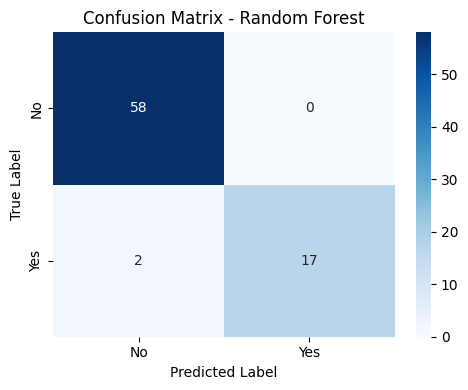

--------------------------------------------------
🔹 Model: SVM
   - Akurasi: 0.9870
              precision    recall  f1-score   support

          No       0.98      1.00      0.99        58
         Yes       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



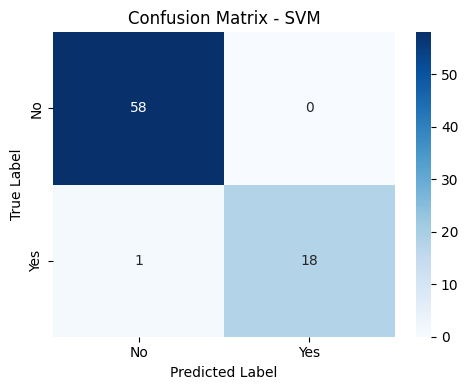

--------------------------------------------------
🔹 Model: Logistic Regression
   - Akurasi: 0.9610
              precision    recall  f1-score   support

          No       0.97      0.98      0.97        58
         Yes       0.94      0.89      0.92        19

    accuracy                           0.96        77
   macro avg       0.96      0.94      0.95        77
weighted avg       0.96      0.96      0.96        77



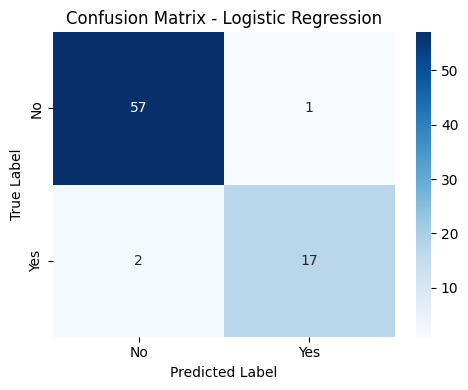

--------------------------------------------------
🎯 KESIMPULAN AKHIR:
Model dengan akurasi tertinggi adalah: **SVM**
Akurasi terbaik: 0.9870


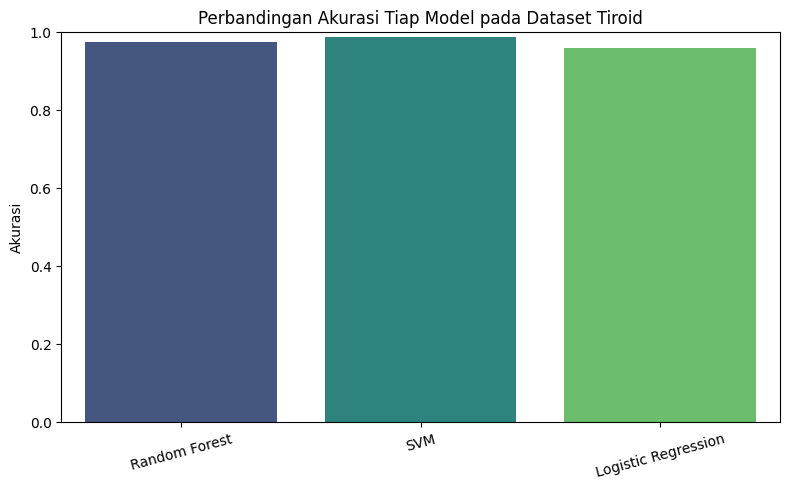

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# 1. Load dataset
data = fetch_ucirepo(id=915)
X = data.data.features
y = data.data.targets

# 2. Encode target (ravel untuk menghindari warning)
le = LabelEncoder()
y_encoded = le.fit_transform(y.values.ravel())

# 3. One-hot encoding fitur kategorikal
X_encoded = pd.get_dummies(X)

# 4. Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# 6. Model definisi
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# 7. Pelatihan, Evaluasi, Confusion Matrix
best_model_name = None
best_model_score = 0.0
model_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluasi akurasi
    acc = accuracy_score(y_test, y_pred)
    model_scores[name] = acc

    print(f"🔹 Model: {name}")
    print(f"   - Akurasi: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    print("-" * 50)

    # Cek model terbaik
    if acc > best_model_score:
        best_model_score = acc
        best_model_name = name

# 8. Kesimpulan Model Terbaik
print("🎯 KESIMPULAN AKHIR:")
print(f"Model dengan akurasi tertinggi adalah: **{best_model_name}**")
print(f"Akurasi terbaik: {best_model_score:.4f}")

# ====================
# 9. VISUALISASI PERBANDINGAN AKURASI
# ====================
plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(model_scores.keys()),
    y=list(model_scores.values()),
    hue=list(model_scores.keys()),     # ✅ fix warning future seaborn
    palette="viridis",
    legend=False
)
plt.title("Perbandingan Akurasi Tiap Model pada Dataset Tiroid")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


## Link Web 

https://super-duper-engine-x5rxq6grxgrphvv44-8501.app.github.dev/ 